In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
spy_price_data = pd.read_csv('SPY.csv')
spy_price_data = spy_price_data.rename(columns = {"Date":"Date",\
                        "Open":"spy_price_open",\
                        "High":'spy_price_high',\
                        'Low':'spy_price_low',\
                        'Close':'spy_price_close',\
                        'Adj Close':'spy_price_adj_close',\
                        'Volume':'spy_price_volume'})

0


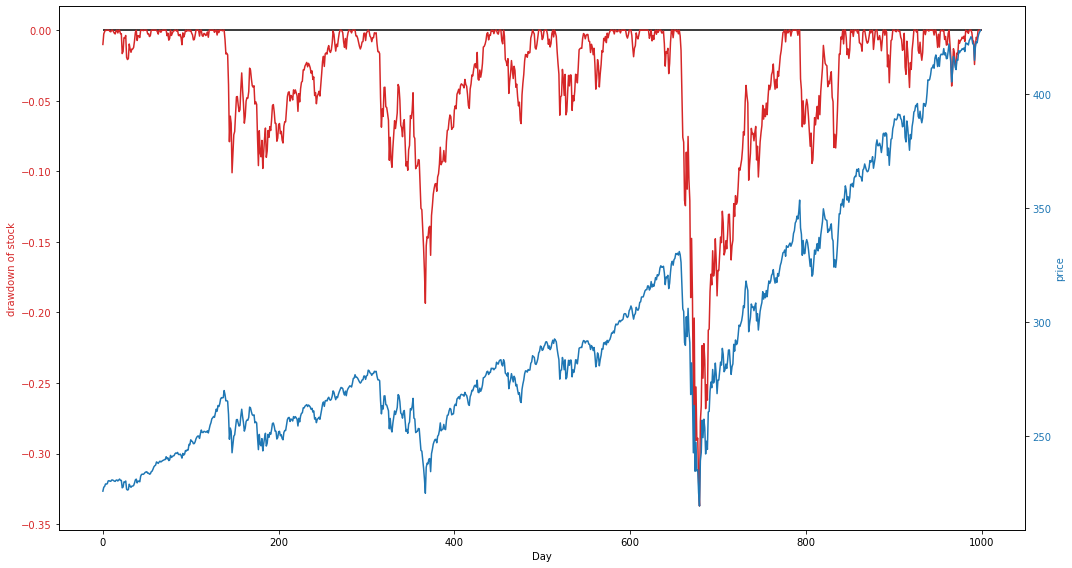

In [3]:
raw_price_list = spy_price_data['spy_price_adj_close'].tolist()

max_draw_down = [0]
peak_price = raw_price_list[0]

for index in range(1,len(raw_price_list)):
   
    if raw_price_list[index]>=peak_price:
        max_draw_down.append(0)
        peak_price = raw_price_list[index]
    else:
        draw_down = (1-(raw_price_list[index]/peak_price))*-1
        max_draw_down.append(draw_down)

print(max_draw_down[-1])

most_recent_days = 1000

plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('drawdown of stock', color=color)
ax1.plot(max_draw_down[-1*most_recent_days:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#a horizontal line according to the current level
ax1.hlines(max_draw_down[-1],0,len(max_draw_down[-1*most_recent_days:]),color = 'black')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('price', color=color)  # we already handled the x-label with ax1
ax2.plot(raw_price_list[-1*most_recent_days:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()

